In [1]:

import pandas as pd
import seaborn as sns

from iFEMG_feature import *

In [2]:
# 读取数据，包含三个肌肉信号通道的特征值
data_df = pd.read_csv(r"E:\Data\积水潭患者数据集\w1s1\huance\w1s1_affected_tricps_br.csv", index_col=0, header=[0,1])
data_df.head

<bound method NDFrame.head of       agonist_ch1                                                     \
     subject_name height(cm) weight(kg) gender age    sensor_channel   
0   w1s1_affected        183         75      1  35  tricps_br_medial   
1   w1s1_affected        183         75      1  35  tricps_br_medial   
2   w1s1_affected        183         75      1  35  tricps_br_medial   
3   w1s1_affected        183         75      1  35  tricps_br_medial   
4   w1s1_affected        183         75      1  35  tricps_br_medial   
5   w1s1_affected        183         75      1  35  tricps_br_medial   
6   w1s1_affected        183         75      1  35  tricps_br_medial   
7   w1s1_affected        183         75      1  35  tricps_br_medial   
8   w1s1_affected        183         75      1  35  tricps_br_medial   
9   w1s1_affected        183         75      1  35  tricps_br_medial   
10  w1s1_affected        183         75      1  35  tricps_br_medial   
11  w1s1_affected        183      

In [3]:
df2show = data_df['agonist_ch1']
df2show["mean_freq"]

0     17.820343
1     18.288631
2     17.392130
3     18.329010
4     17.833482
5     17.663251
6     16.706084
7     16.996411
8     16.911701
9     18.369435
10    18.859504
11    23.812825
12    18.228666
13    19.465356
14    22.462367
15    22.797919
16    19.126742
17    18.345665
18    19.519375
19    23.142259
Name: mean_freq, dtype: float64

In [ ]:
listdf2show

e:\code\iFEMG-processing\iFEMG_feature.py:786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[name] = (dataframe[name] - min_value)/(max_value - min_value)


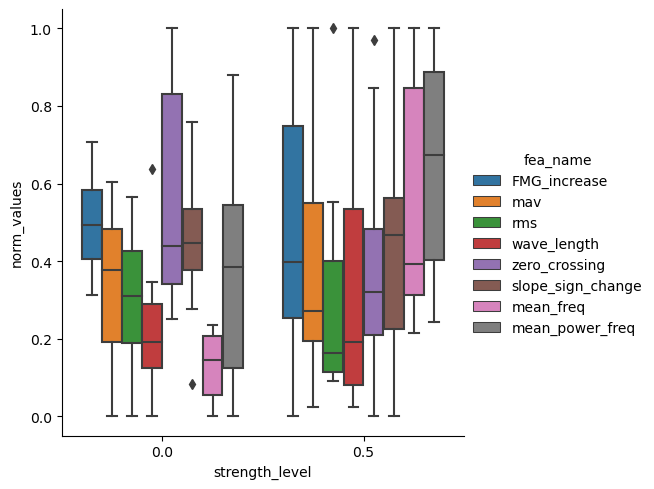

In [8]:
"""
归一化函数有问题
"""
# 需要显示和归一化的特征名称
col_name = ['FMG_increase', 'mav', 'rms', 'wave_length', 'zero_crossing', 'slope_sign_change', 'mean_freq', 'mean_power_freq']
# 调用归一化函数对dataframe进行归一化
sb_fea_norm_df = fea_df_norm(df2show, col_name)
#df_temp = df2show.drop(columns=['subject_name', 'height(cm)', 'weight(kg)', 'gender', 'age', 'sensor_channel', 'label(kg)'], axis=1)
#sb_fea_norm_df = z_score_norm(df_temp)

# show figure
show_df = pd.DataFrame(columns = ('subject', 'strength_level', 'norm_values', 'fea_name'))

for index, row in sb_fea_norm_df.iterrows():    # go through each row
    for i in col_name:
        show_df = pd.concat([show_df, pd.DataFrame({'subject': [row['subject_name']],
                                                    'strength_level': [row['label(kg)']],
                                                    'norm_values': [row[i]],
                                                    'fea_name': [i]})], axis = 0, ignore_index=True)
# kind = point(两点连线带errbar)/violin(小提琴图)/box(箱线图)
sns.catplot(x = "strength_level",
            y = "norm_values",
            hue = "fea_name",
            data = show_df,
            kind = 'box')